In [19689]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import h5py

SAVE_PLOTS = False

# Setup Parameters

Hamamatsu S13360-6025 SiPM

Voltage: $55.5 V$, Current: $
\approx 0.06 \mu A$

Trigger height: $2.32mV$, div $20mV$/$10 \mu s$


In [ ]:
vp2p_path = r'data\sipm_spectroscopy\vp2ps_20250314-163145_Cs137_preliminary_10mins.csv'
df = pd.read_csv(vp2p_path)
df.head(1)

,Unnamed: 0,t,V
0,0,1.741967e+09,0.0118


In [19691]:

df['mV'] = df['V']*1000
mV_low_cut = 1
mV_high_cut = 40
df = df.loc[(df['mV'] > mV_low_cut) & (df['mV'] < mV_high_cut)].dropna()

df['t'] = [datetime.fromtimestamp(t) for t in df['t']]
df['t'] = pd.to_datetime(df['t'])
df = df.sort_values(by='t')

In [19692]:
def print_stats():
    time_diff = (df['t'].iloc[-1] - df['t'].iloc[0]).seconds / 60
    avg_data_points_per_minute = df.shape[0] / time_diff

    print(f'Number of data points: {df.shape[0]}')
    print(f'Start time: {df["t"].iloc[0]}')
    print(f'End time: {df["t"].iloc[-1]}')
    print(f'Average number of data points per minute: {avg_data_points_per_minute:.2f}')
    print(f'Average number of data points per hour: {avg_data_points_per_minute * 60:.2f}')
    print(f'Total time of measurement: {time_diff // 60:.0f} hours and {time_diff % 60:.0f} minutes')
print_stats()

Number of data points: 711
Start time: 2025-03-14 16:42:23.302420
End time: 2025-03-14 16:52:10.729120
Average number of data points per minute: 72.67
Average number of data points per hour: 4360.48
Total time of measurement: 0 hours and 10 minutes


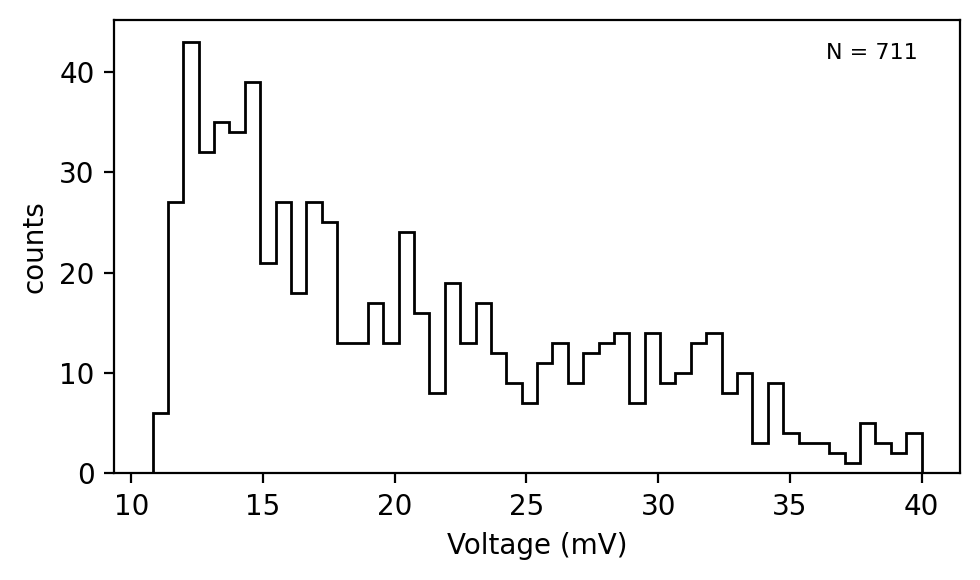

In [19693]:

fig, ax = plt.subplots(1,1, figsize=(5,3), dpi=200)
ax.hist(df['mV'], bins=50, color='black', histtype='step', linewidth=1)
# rescale the x axis by 1000 to convert from V to mV
# ax.set_xticks(ax.get_xticks()*1000)
ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('counts')
plt.tight_layout()


# display the number of entries in the upper right corner of the plot
n_entries = df.shape[0]
ax.text(0.95, 0.95, f'N = {n_entries}', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=8)

ax.set_xlabel('Voltage (mV)')
ax.set_ylabel('counts')
plt.tight_layout()
if SAVE_PLOTS:
    save_dir = f'plots/sipm_spectroscopy/preliminary/threshhold_4pt4mV'
    ax.set_yscale('log')
    plt.savefig(f'{save_dir}/spectrum_Co60_10mins_log.png', dpi=200)
    ax.set_yscale('linear')
    plt.savefig(f'{save_dir}/spectrum_Co60_10mins.png', dpi=200)

plt.show()